In [679]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
path2 = '/Users/ppangppang/Desktop/puzzle/'

# 한글글꼴
import warnings
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttfn"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

warnings.simplefilter(action='ignore')


df = pd.read_csv(path2+'repair2.csv')
df

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,419,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-07,13:48
2,902,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-01-08,16:20
3,18,Survey,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-09,6:55
4,852,Survey,Edd,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,2020-01-10,11:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13257,707,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,0:16
13258,25,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,7:48
13259,762,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,11:53
13260,12,InternRepair,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,18:10


In [700]:
# 기초정보확인
# df.info()
# df.isnull().sum()
# df.describe()

# 업무 Flow 확인 및 문제점확인

## case 별 task 확인

In [681]:
# case별 건수 어떻게 분호하는지 확인 (2건 , 14건~18건)
temp = df.groupby(df['caseID']).count()[['taskID']].reset_index().sort_values(by='taskID')
# temp[temp['taskID'] != 2]
temp

,caseID,taskID
498,499,2
828,829,2
442,443,2
71,72,2
824,825,2
...,...,...
455,456,17
652,653,17
774,775,17
511,512,18


In [684]:
df[df['caseID']==865].taskID.unique()

array(['FirstContact', 'ArrangeSurvey', 'InternRepair', 'Survey',
       'MakeTicket', 'ReadyInformClient', 'InformClientSurvey',
       'SendTicketToFinAdmin', 'TicketReady', 'RepairReady'], dtype=object)

In [682]:
# 2건의 경우, 잘못 걸려온 전화임
short_task = temp[temp['taskID'] == 2]['caseID'].to_list() 
df[df['caseID'].isin(short_task) ==True].taskID.unique() # 2건 이하 case가 잘못걸려온게 맞는지 정보 확인

array(['InformClientWrongPlace', 'FirstContact'], dtype=object)

In [686]:
df[df['caseID']==886]

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
2159,886,Survey,Nick,complete,NaN,NaN,NaN,False,480.0,4.0,NaN,1970-01-01,16:31
4690,886,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,16:08
5189,886,Survey,Nick,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,16:08
5375,886,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,15:58
6941,886,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-01,23:43
8481,886,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,23:53
8718,886,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,16:31
9018,886,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,16:06
10268,886,TicketReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,6:44
10948,886,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,16:08


In [620]:
# case 10건정도 직접 확인
# df[df['caseID']==886].sort_values(by=['date','time'])

## 업무 순서
-- 1단계 접수
1. 접수
    - FirstContact(최초접수) - InformClientWrongPlace(잘못 걸린 전화 안내)
2. 티켓제작
    - MakeTicket(티켓제작)
3. 설문조사 준비
    - ArrangeSurvey(설문조사준비)
4. 설문조사 안내
    - InformClientSurvey(고객에게 설문조사알림)
    
-- 2단계 설문조사    
5. 설문조사 완료 
    - Survey(설문조사)
    
-- 3단계 수리
6. 수리정보확인
    - ImmediateRepair(즉시 수리)
    - ExternRepair(외부수리)
    - InternRepair(내부수리)
    - RepairReady(수리준비)
    
-- 4단계 결과보고    
7. 최종관리자에게 티켓 컨펌 / 티켓발송준비 / 클라리언트에게 티켓 준비 알림
    - SendTicketToFinAdmin(최종관리자에게 티켓보내기)
    - TicketReady(티겟준비)
    - ReadyInformClient(클라이언트에게 준비 알림)

## 전처리
- 2건 이하는 잘못 걸려온 전화 drop
- case별로 처리하되 task이름 재지정해서 시간차 구하기

In [416]:
# 잘못 걸려온 전화 drop
df_case = df[df['caseID'].isin(short_task) == False]
df_case['taskID'] = df_case['taskID'].map({'FirstContact' : '1.FirstContact', 'MakeTicket' : '2.MakeTicket', 
                                           'ArrangeSurvey' : '3.ArrangeSurvey', 'InformClientSurvey' : '4.InformClientSurvey',
                                           'Survey' : '5.Survey', 'ImmediateRepair' : '6.ImmediateRepair','ExternRepair' : '6.ExternRepair',
                                           'InternRepair' : '6.InternRepair', 'RepairReady' : '6.RepairReady','TicketReady':'7.TicketReady',
                                           'SendTicketToFinAdmin' : '7.SendTicketToFinAdmin','ReadyInformClient':'7.ReadyInformClient'},na_action=None)

# year정보 부정확하므로 제거
df_case['datetime'] = pd.to_datetime((df_case['date']+' '+df_case['time']))
df_case['month'] = df_case['datetime'].dt.month
df_case['day'] = df_case['datetime'].dt.day
df_case['hour'] = df_case['datetime'].dt.hour
df_case['minute'] = df_case['datetime'].dt.minute
df_case = df_case.sort_values(by=['caseID','taskID','month','day','hour','minute'])
df_case.index = range(len(df_case))

# case list 생성
case_num = df_case['caseID'].drop_duplicates().to_list()


# 잘못된 일자정보 변경 # case별 작업
temp_df=pd.DataFrame() # 변경작업한 dataframe 임시 concat용
for case in case_num:
    temp = df_case[df_case['caseID']==case]
    temp.index = range(len(temp)) # loc 지정 쉽게 매 case마다 index 변경
    temp['proc_time'] =0.0 # 소요시간 확인 컬럼
    
    # case별 month, day 작업, 월, 일이 다음작업과 크게 다르게 적혀있는 경우, 다음 작업 일자정보 가져오기
    for i in range(len(temp)-1):
        if temp['month'].loc[i] > temp['month'].loc[i+1]:
            temp['month'].loc[i] = temp['month'].loc[i+1]
            
        if temp['day'].loc[i] > temp['day'].loc[i+1]:
            temp['day'].loc[i] = temp['day'].loc[i+1]
            
    # 작업별 소요시간 컬럼 생성
    for i in range(len(temp)-1):
        temp['proc_time'].loc[i+1] = ((temp['month'].loc[i+1] - temp['month'].loc[i])*30*24*60 + 
                                     (temp['day'].loc[i+1] - temp['day'].loc[i])*24*60 +
                                     (temp['hour'].loc[i+1] - temp['hour'].loc[i])*60 +
                                     (temp['minute'].loc[i+1] - temp['minute'].loc[i]))
            
    temp_df = pd.concat([temp_df, temp])
    
# 필요없는 컬럼 제거 및 df_case업데이트
df_case = temp_df.drop(columns={'date','time','datetime'})

# =>- RepairReady는 수리 종료와 함께 같이 처리되는 건이 대다수 -> 없어도 되는 컬럼같음
# =>- 후처리 부분에서, 티켓 컨펌/고객에게 안내준비/ 티켓준비 순서가 뒤죽박죽 -> 세가지 flow 한번에 처리하는게 좋아보임

# RepairReady는 수리 종료와 함께 같이 처리되는 건이 대다수로 제거
df_case = df_case[df_case['taskID']!='6.RepairReady']

/var/folders/c0/q_ltjrb55gzc5wvhsv7s_vsh0000gn/T/ipykernel_10055/2275938780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case['taskID'] = df_case['taskID'].map({'FirstContact' : '1.FirstContact', 'MakeTicket' : '2.MakeTicket',
/var/folders/c0/q_ltjrb55gzc5wvhsv7s_vsh0000gn/T/ipykernel_10055/2275938780.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case['datetime'] = pd.to_datetime((df_case['date']+' '+df_case['time']))
/var/folders/c0/q_ltjrb55gzc5wvhsv7s_vsh0000gn/T/ipykernel_10055/22759

In [692]:
# caseID별 확인
df_case[df_case['caseID']==600][['caseID','taskID','proc_time']]

,caseID,taskID,proc_time
0,600,1.FirstContact,0.0
1,600,2.MakeTicket,0.0
2,600,2.MakeTicket,4.0
3,600,3.ArrangeSurvey,0.0
4,600,3.ArrangeSurvey,151.0
5,600,4.InformClientSurvey,0.0
6,600,5.Survey,2091.0
7,600,5.Survey,45.0
8,600,6.InternRepair,1702.0
9,600,6.InternRepair,242.0


## 시각화
- survey요청 후 수락까지 걸리는 시간 분포 확인
- 6번 + complete 시간이랑 EstimatedRepairTime 확인

In [441]:
# survey요청 후 수락까지 걸리는 시간 분포 확인 데이터셋
df_sns = df_case[(df_case['taskID']=='5.Survey') & (df_case['eventtype']=='start')]
df_sns.describe()

,caseID,objectKey,EstimatedRepairTime,RepairCode,month,day,hour,minute,proc_time
count,927.000000,0.0,0.0,0.0,925.000000,925.000000,925.000000,925.000000,923.000000
mean,499.333333,NaN,NaN,NaN,1.010811,7.588108,11.247568,29.582703,4514.248104
std,289.297201,NaN,NaN,NaN,0.197089,4.136741,7.019631,17.548354,10643.889030
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,-122422.000000
25%,250.500000,NaN,NaN,NaN,1.000000,4.000000,5.000000,14.000000,159.000000
50%,497.000000,NaN,NaN,NaN,1.000000,7.000000,11.000000,30.000000,2398.000000
75%,745.500000,NaN,NaN,NaN,1.000000,11.000000,17.000000,45.000000,7487.000000
max,1000.000000,NaN,NaN,NaN,5.000000,18.000000,23.000000,59.000000,184267.000000


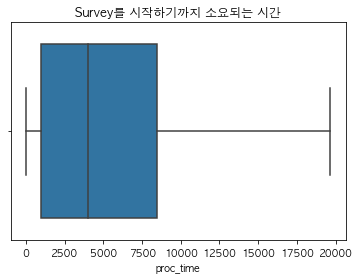

In [460]:
# 이상치 제거한 boxplot으로 분포 확인
df_sns = df_sns[(df_sns['proc_time'] > 0) & (df_sns['proc_time'] < 30000)]
plt.title('Survey를 시작하기까지 소요되는 시간')
sns.boxplot(data=df_sns, x='proc_time')
plt.show()

In [461]:
# survey 자체소요시간
df_sns2 = df_case[(df_case['taskID']=='5.Survey') & (df_case['eventtype']=='complete')]
df_sns2.describe()

,caseID,objectKey,EstimatedRepairTime,RepairCode,month,day,hour,minute,proc_time
count,926.000000,0.0,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,499.625270,NaN,194.427646,1.636069,1.021598,7.623110,11.219222,29.982721,982.666307
std,289.316882,NaN,79.767545,0.904257,0.399416,4.157633,6.985429,17.350184,18983.846487
min,1.000000,NaN,60.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-169868.000000
25%,251.250000,NaN,120.000000,1.000000,1.000000,4.000000,5.000000,15.000000,32.000000
50%,497.500000,NaN,220.000000,1.000000,1.000000,7.000000,11.000000,31.000000,42.000000
75%,745.750000,NaN,240.000000,2.000000,1.000000,11.000000,17.000000,45.000000,53.000000
max,1000.000000,NaN,480.000000,4.000000,12.000000,22.000000,23.000000,59.000000,493967.000000


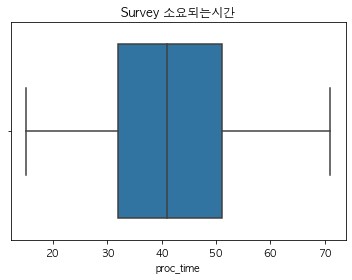

In [462]:
# 이상치 제거한 boxplot으로 분포 확인
df_sns2 = df_sns2[(df_sns2['proc_time'] > 0) & (df_sns2['proc_time'] < 120)]
plt.title('Survey 소요되는시간')
sns.boxplot(data=df_sns2, x='proc_time')
plt.show()

In [465]:
# Survey에서 확인한 시간이랑 실제 소요시간 비교
df_repair_time = df_case[((df_case['taskID']=='6.ImmediateRepair') | (df_case['taskID']=='6.ExternRepair') | (df_case['taskID']=='6.InternRepair') | (df_case['taskID']=='5.Survey')) & (df_case['eventtype']=='complete')]
df_repair_time = df_repair_time[['caseID','taskID','EstimatedRepairTime','proc_time']]
df_repair_time[50:]

,caseID,taskID,EstimatedRepairTime,proc_time
7,545,5.Survey,120.0,35.0
9,545,6.ImmediateRepair,NaN,132.0
7,712,5.Survey,220.0,39.0
9,712,6.InternRepair,NaN,198.0
7,815,5.Survey,240.0,31.0
...,...,...,...,...
9,833,6.InternRepair,NaN,264.0
7,301,5.Survey,220.0,29.0
9,301,6.InternRepair,NaN,242.0
7,794,5.Survey,220.0,53.0


- 위 그래프에서 대체적으로 예상시간이랑 실제 소요시간 비슷한거 확인가능

3. 문제점
    - [프로세스관련]
        - 사람이 작업하는 과정에서 start complete 둘 다 쓰는 번거로움(dataframe 보여주기)
        - RepairReady는 의미상 3단계 수리 작업이 시작될 때 되야하나, 대부분 작업 종료와 함께 같이 입력된다 (dataframe 보여주기)
        - 수리 종료 후 4단계가 결국 같은 의미로 보임(관리자 보고, 티켓준비, 고객에 티켓발송준비) (dataframe 보여주기)
        - survey를 하기까지 시간이 오래걸림, survey자체는 오래안걸림 약 30분 + 간혹 survey준비가 오래 걸릴때가 있음(boxplot) +. 수리예측 및 수리자체 flow는 철저히 지켜지는 편(dataframe보요주기)

4. 해결방안
    - [프로세스관련]
        - -> complete를 입력하면 start 데이터 drop 해서 과정관리도 같이 할 수 있게
        - -> RepairReady flow는 필요없어보임
        - -> 4단계는 일괄처리 (어차피 준비니까 승인여부에 따라 판단가능)
        - -> survey를 신속하게 처리하는 push나 안내 프로세스 필요해보임

# 케이스 소요에 영향있는 변수 확인

주요 변수가 되는 요인위주로 확인
- RepairType / RepairCode / TaskID-작업별 / RepairInternally

## 시각화

In [467]:
df_case

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,month,day,hour,minute,proc_time
0,419,1.FirstContact,Monica,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,11.0,40.0,0.0
1,419,2.MakeTicket,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,11.0,40.0,0.0
2,419,2.MakeTicket,Monica,complete,NaN,P,4689.0,NaN,NaN,NaN,NaN,1.0,6.0,11.0,46.0,6.0
3,419,3.ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,11.0,46.0,0.0
4,419,3.ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,11.0,51.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,794,6.InternRepair,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,2.0,50.0,6599.0
9,794,6.InternRepair,Edd,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,6.0,8.0,198.0
11,794,7.ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,16.0,6.0,44.0,36.0
12,794,7.SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,9.0,36.0,172.0


- 2.MakeTicket에서 RepairType, 5.Survey에서 소요시간, 수리코드, 6에서 실제 소요시간, 수리정보 확인가능 => 해당정보 기준으로 데이터 정리

In [508]:
df_feature = df_case.copy()
df_feature = df_feature.drop(columns={'originator','objectKey','RepairOK','month','day','hour','minute'})
df_feature

,caseID,taskID,eventtype,contact,RepairType,RepairInternally,EstimatedRepairTime,RepairCode,proc_time
0,419,1.FirstContact,complete,Phone,NaN,NaN,NaN,NaN,0.0
1,419,2.MakeTicket,start,NaN,NaN,NaN,NaN,NaN,0.0
2,419,2.MakeTicket,complete,NaN,P,NaN,NaN,NaN,6.0
3,419,3.ArrangeSurvey,start,NaN,NaN,NaN,NaN,NaN,0.0
4,419,3.ArrangeSurvey,complete,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...
8,794,6.InternRepair,start,NaN,NaN,NaN,NaN,NaN,6599.0
9,794,6.InternRepair,complete,NaN,NaN,NaN,NaN,NaN,198.0
11,794,7.ReadyInformClient,complete,NaN,NaN,NaN,NaN,NaN,36.0
12,794,7.SendTicketToFinAdmin,complete,NaN,NaN,NaN,NaN,NaN,172.0


RepairCode 2

### 3단계 작업별

In [ ]:
ImmediateRepair(즉시 수리)
ExternRepair(외부수리)
InternRepair(내부수리)

In [633]:
df_im = df_feature[(df_feature['taskID']=='6.ImmediateRepair') & (df_feature['proc_time']=='complete')][['caseID','taskID','proc_time']]
df_ex = df_feature[(df_feature['taskID']=='6.ExternRepair') & (df_feature['eventtype']=='complete')][['caseID','taskID','proc_time']]
df_in = df_feature[(df_feature['taskID']=='6.InternRepair') & (df_feature['eventtype']=='complete')][['caseID','taskID','proc_time']]

# 이상치 제거
df_im = df_im[(df_im['proc_time'] > 0) & (df_im['proc_time'] < 1000)]
df_ex = df_ex[(df_ex['proc_time'] > 0) & (df_ex['proc_time'] < 1000000)]
df_in = df_in[(df_in['proc_time'] > 0) & (df_in['proc_time'] < 1000)]


In [669]:
df_im = df_feature[(df_feature['taskID']=='6.ImmediateRepair')][['caseID','taskID','proc_time']]
df_ex = df_feature[(df_feature['taskID']=='6.ExternRepair')][['caseID','taskID','proc_time']]
df_in = df_feature[(df_feature['taskID']=='6.InternRepair')][['caseID','taskID','proc_time']]

# 이상치 제거
df_im = df_im[(df_im['proc_time'] > 60) & (df_im['proc_time'] < 200)]
df_ex = df_ex[(df_ex['proc_time'] > 70) & (df_ex['proc_time'] < 150)]
df_in = df_in[(df_in['proc_time'] > 140) & (df_in['proc_time'] < 300)]


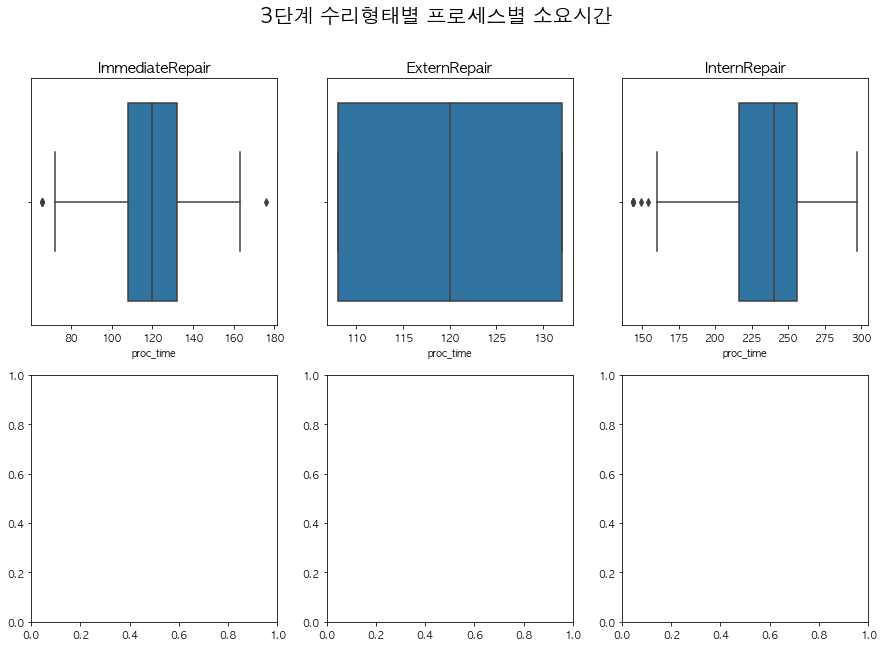

In [699]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('3단계 수리형태별 프로세스별 소요시간',fontsize=20)

sns.boxplot(ax=axes[0, 0], data=df_im, x='proc_time')
axes.flat[0].set_title('ImmediateRepair',fontsize=15)
sns.boxplot(ax=axes[0, 1], data=df_ex, x='proc_time')
axes.flat[1].set_title('ExternRepair',fontsize=15)
sns.boxplot(ax=axes[0, 2], data=df_in, x='proc_time')
axes.flat[2].set_title('InternRepair',fontsize=15)
plt.show()

- RepairType별 : 대부분 비슷한 분포, 전체적으로 10분이내 P,E타입은 유사함, B타입은 짧음
- RepairCode별 : 2의 경우 소요시간이 짧음
- TaskID 3단계 작업별 소요시간 확인 : interRepair에 소요되는 시간이 가장 길다

### RepairInternally별

In [693]:
df_rein_T = df_feature[df_feature['RepairInternally']==True]
df_rein_F = df_feature[((df_feature['RepairInternally']!=True) & (df_feature['taskID']=='5.Survey') &(df_feature['eventtype']=='complete'))]
# 이상치 제거
df_rein_T = df_rein_T[(df_rein_T['proc_time'] > 0) & (df_rein_T['proc_time'] < 120)]
df_rein_F = df_rein_F[(df_rein_F['proc_time'] > 0) & (df_rein_F['proc_time'] < 120)]

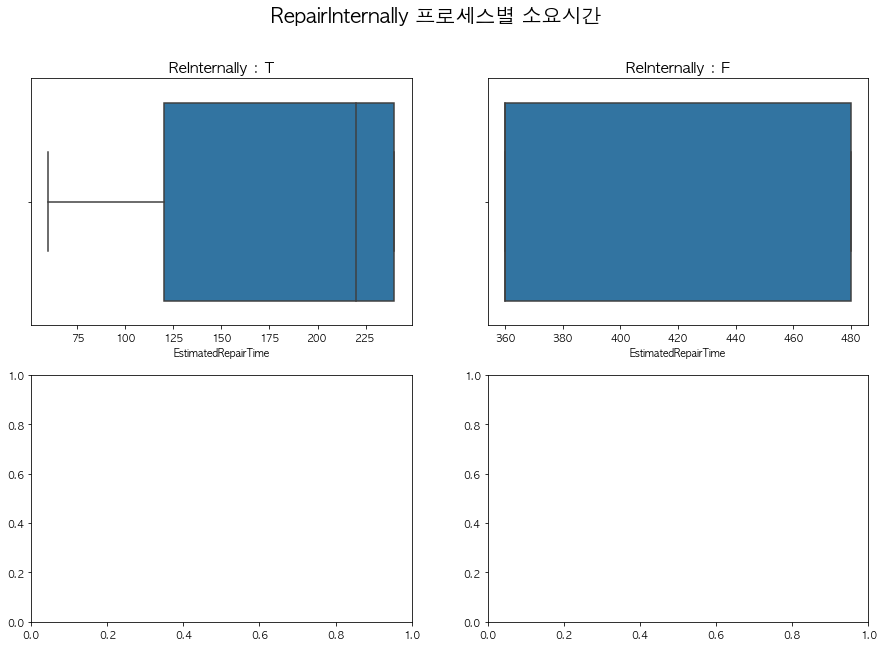

In [696]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('RepairInternally 프로세스별 소요시간',fontsize=20)

# unknwon이 많으므로 제외하고 시각화
sns.boxplot(ax=axes[0, 0], data=df_rein_T, x='EstimatedRepairTime')
axes.flat[0].set_title('ReInternally : T',fontsize=15)
sns.boxplot(ax=axes[0, 1], data=df_rein_F, x='EstimatedRepairTime')
axes.flat[1].set_title('ReInternally : F',fontsize=15)

plt.show()

[케이스 소요에 영향있는 변수]
- RepairType별 : 대부분 비슷한 분포, 전체적으로 10분이내 P,E타입은 유사함, B타입은 짧음
- RepairCode별 : 2의 경우 소요시간이 짧음
- TaskID 3단계 작업별 소요시간 확인 : interRepair에 소요되는 시간이 가장 길다
- 내부수리여부 : 내부수리가 되어있는 경우 1.6배 작업이 빠름

### Repair Type별

In [525]:
df_p = df_feature[df_feature['RepairType']=='P'][['caseID','RepairType','proc_time']]
df_e = df_feature[df_feature['RepairType']=='E'][['caseID','RepairType','proc_time']]
df_b = df_feature[df_feature['RepairType']=='B'][['caseID','RepairType','proc_time']]
# 이상치 제거
df_p = df_p[(df_p['proc_time'] > 0) & (df_p['proc_time'] < 100)]
df_e = df_e[(df_e['proc_time'] > 0) & (df_e['proc_time'] < 100)]
df_b = df_b[(df_b['proc_time'] > 0) & (df_b['proc_time'] < 100)]

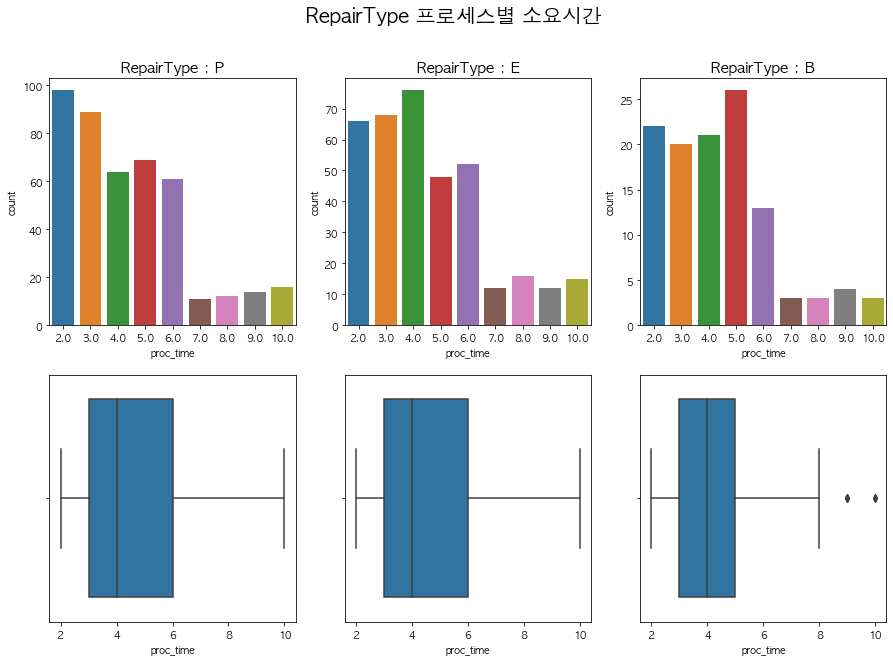

In [598]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('RepairType 프로세스별 소요시간',fontsize=20)

sns.countplot(ax=axes[0, 0], data=df_p, x='proc_time')
axes.flat[0].set_title('RepairType : P',fontsize=15)
sns.countplot(ax=axes[0, 1], data=df_e, x='proc_time')
axes.flat[1].set_title('RepairType : E',fontsize=15)
sns.countplot(ax=axes[0, 2], data=df_b, x='proc_time')
axes.flat[2].set_title('RepairType : B',fontsize=15)

sns.boxplot(ax=axes[1, 0], data=df_p, x='proc_time')
sns.boxplot(ax=axes[1, 1], data=df_e, x='proc_time')
sns.boxplot(ax=axes[1, 2], data=df_b, x='proc_time')

plt.show()

- 별 차이없음

### RepairCode별

In [616]:
df_code1 = df_feature[df_feature['RepairCode']==1.0][['caseID','RepairCode','proc_time']]
df_code2 = df_feature[df_feature['RepairCode']==2.0][['caseID','RepairCode','proc_time']]
df_code3 = df_feature[df_feature['RepairCode']==3.0][['caseID','RepairCode','proc_time']]
df_code4 = df_feature[df_feature['RepairCode']==4.0][['caseID','RepairCode','proc_time']]
# 이상치 제거
df_code1 = df_code1[(df_code1['proc_time'] > 0) & (df_code1['proc_time'] < 150)]
df_code2 = df_code2[(df_code2['proc_time'] > 0) & (df_code2['proc_time'] < 120)]
df_code3 = df_code3[(df_code3['proc_time'] > 0) & (df_code3['proc_time'] < 10000)]
df_code4 = df_code4[(df_code4['proc_time'] > 0) & (df_code4['proc_time'] < 1000)]

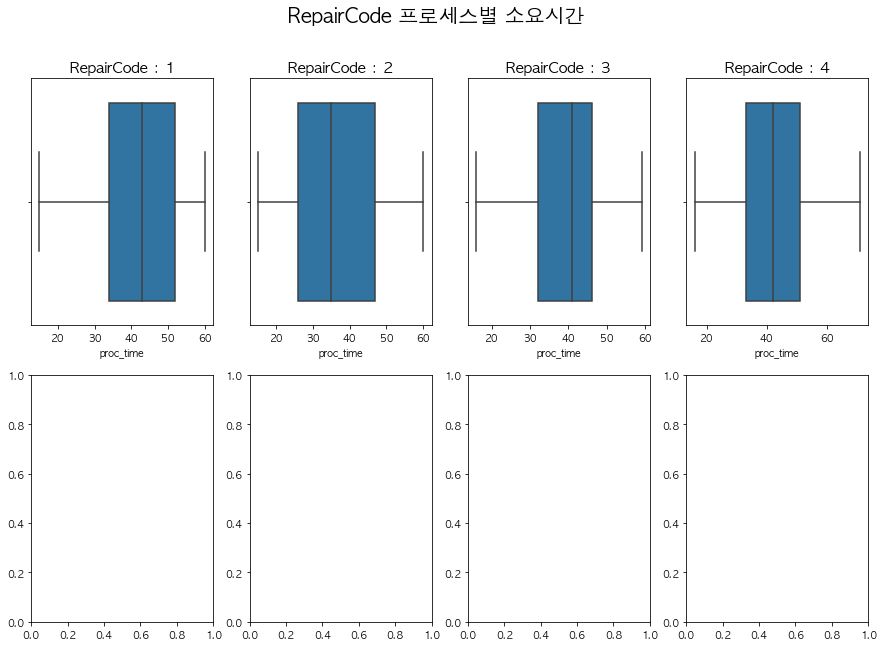

In [617]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('RepairCode 프로세스별 소요시간',fontsize=20)

sns.boxplot(ax=axes[0, 0], data=df_code1, x='proc_time')
axes.flat[0].set_title('RepairCode : 1',fontsize=15)
sns.boxplot(ax=axes[0, 1], data=df_code2, x='proc_time')
axes.flat[1].set_title('RepairCode : 2',fontsize=15)
sns.boxplot(ax=axes[0, 2], data=df_code3, x='proc_time')
axes.flat[2].set_title('RepairCode : 3',fontsize=15)
sns.boxplot(ax=axes[0, 3], data=df_code4, x='proc_time')
axes.flat[3].set_title('RepairCode : 4',fontsize=15)

plt.show()